# Simple network creation

This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the ```Snudda/snudda/examples/notebooks``` directory, as all paths are given relative to there.

First we create a ```network-config.json``` file in ```networks/simple_example``` which is a subdirectory to the ```notebooks``` directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the ```Snudda/snudda/data/neurons/dspn``` and ```ispn``` folders.

Here we have set the ```random_seed``` to ```12345```.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(config_file=config_file, random_seed=12345)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
cnc.write_json(config_file)


Seeding with rand_seed=12345
Random seed init to 2688385916
Random seed place to 3048105090
Random seed detect to 4196366895
Random seed prune to 3152189807
Random seed input to 924159892
Random seed simulate to 1692637855
Using cube for striatum
Adding neurons: dSPN from dir $DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $DATA/neurons/striatum/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

In [3]:
from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/64(200 neurons)
Processing hyper voxel : 20/64(181 neurons)
Processing hyper voxel : 5/64(179 neurons)
Processing hyper voxel : 25/64(166 neurons)
Processing hyper voxel : 17/64(154 neurons)
Processing hyper voxel : 37/64(132 neurons)
Processing hyper voxel : 22/64(119 neurons)
Processing hyper voxel : 4/64(92 neurons)
Processing hyper voxel : 24/64(83 neurons)
Processing hyper voxel : 9/64(72 neurons)
Processing hyper voxel : 16/64(64 neurons)
Processing hyper voxel : 1/64(60 neurons)
Processing hyper voxel : 36/64(58 neurons)
Processing hyper voxel : 41/64(48 neurons)
Processing hyper voxel : 6/64(47 neurons)
Processing hyper voxel : 33/64(34 neurons)
Processing hyper voxel : 26/64(31 neurons)
Processing hyper voxel : 18/64(28 neurons)
Processing hyper voxel : 8/64(26 neurons)
Processing hyper voxel : 38/64(23 neurons)
Processing hyper voxel : 40/64(16 neurons)
Processing hyper voxel : 0/64(10 neuro

Prune the synapses in the network based on the connection information in the ```network-config.json``` file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Synapses: 18/441674 (heap size: 18)
Synapses: 441674/441674 (heap size: 0)
Number of synapses removed where synapse connection not allowed: 0
Number of synapses removed due to distance dependent pruning: 110326
Number of synapses removed randomly: 283085
Number of synapses removed due to too many synapses between connected pair: 2930
Number of synapses removed due to too few synapses between connected pairs: 20819
Number of synapses removed where all synapses between pairs are removed: 0
Synapses before pruning: 441674
Synapses after pruning: 24514 (5.55 % kept)
No gap junctions to prune.


Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

200 neurons with 24514 synapses and 0 gap junctions


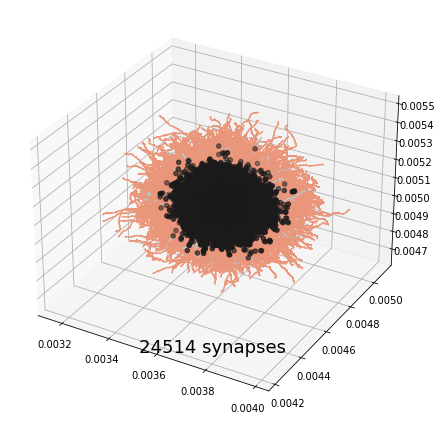

In [5]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)